## Lengthscale calculation: Stable 05 m/s

In [1]:
%%capture
# Important header information
naluhelperdir = './'
import sys
# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(1, naluhelperdir)
import correlate as corr
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
# Set the parameters
prefix='stable05'
basedir='/ascldap/users/lcheung/nscratch/Torque2020/Runs/stable/05ms/mini05_iter18/sliceData'
filebase='HHplane_%07i_0.dat'

#iters=np.arange(30001,40001, 100) # 100
#iters=np.arange(30001,40001, 20) # 500
iters=np.arange(30001,40001, 10) # 1000

loadfromplanes = True
plotprobept    = True
iplane = 0
ij   = [0,0]

avgsavefile     = prefix+'_avgplane_%i_%i_%i.dat'%(iters[0],iters[-1],len(iters))
Rijsavefile     = prefix+'_avgRij_%i_%i_%i_iplane_%i.dat'%(iters[0],iters[-1],len(iters),iplane)

In [3]:
# Construct the file list
filelist=[basedir+'/'+filebase%i for i in iters]

In [4]:
# Load the average (compute if needed)
avgdat, headers       = corr.loadavg(filelist, loadfromplanes, avgsavefile, verbose=True)
ws, winddir           = corr.getavgwind(avgdat, headers, iplane)
print('WS   = '+repr(ws))
print('Wdir = '+repr(winddir))
if loadfromplanes: loadfromplanes = False # Don't need to compute any more after this

Loading [1/1000]: HHplane_0030001_0.dat
Loading [2/1000]: HHplane_0030011_0.dat
Loading [3/1000]: HHplane_0030021_0.dat
Loading [4/1000]: HHplane_0030031_0.dat
Loading [5/1000]: HHplane_0030041_0.dat
Loading [6/1000]: HHplane_0030051_0.dat
Loading [7/1000]: HHplane_0030061_0.dat
Loading [8/1000]: HHplane_0030071_0.dat
Loading [9/1000]: HHplane_0030081_0.dat
Loading [10/1000]: HHplane_0030091_0.dat
Loading [11/1000]: HHplane_0030101_0.dat
Loading [12/1000]: HHplane_0030111_0.dat
Loading [13/1000]: HHplane_0030121_0.dat
Loading [14/1000]: HHplane_0030131_0.dat
Loading [15/1000]: HHplane_0030141_0.dat
Loading [16/1000]: HHplane_0030151_0.dat
Loading [17/1000]: HHplane_0030161_0.dat
Loading [18/1000]: HHplane_0030171_0.dat
Loading [19/1000]: HHplane_0030181_0.dat
Loading [20/1000]: HHplane_0030191_0.dat
Loading [21/1000]: HHplane_0030201_0.dat
Loading [22/1000]: HHplane_0030211_0.dat
Loading [23/1000]: HHplane_0030221_0.dat
Loading [24/1000]: HHplane_0030231_0.dat
Loading [25/1000]: HHplan

In [5]:
# Create the probe list for LONGITUDINAL
# Set parameters
winddir= 225
if (winddir>270): s=-1
else:             s=+1
startx = np.arange(0,61,5)
starty = np.arange(0,61,5)[::s]
probelength = 1500
startp = []
yoffset=0
[[startp.append([x,y+yoffset*iy,iplane]) for x in startx] for iy, y in enumerate(starty)]

plistLONG = corr.makeprobeline(startp, winddir, probelength, avgdat)

Nlong      = len(plistLONG)
print("Len(plist)=%i"%Nlong)

Len(plist)=169


In [6]:
# Create the probe list for LATERAL
# Set parameters
winddir= 315
if (winddir>270): s=-1
else:             s=+1
startx = np.arange(0,61,5)
starty = np.arange(0,61,5)[::s]
probelength = 1500
startp = []
yoffset=0
[[startp.append([x,y+yoffset*iy,iplane]) for x in startx] for iy, y in enumerate(starty)]

plistLAT = corr.makeprobeline(startp, winddir, probelength, avgdat)

Nlat     = len(plistLAT)
print("Len(plist)=%i"%Nlat)

Len(plist)=169


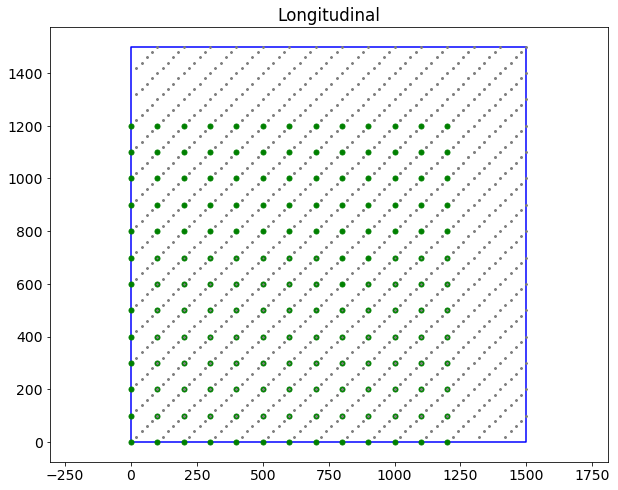

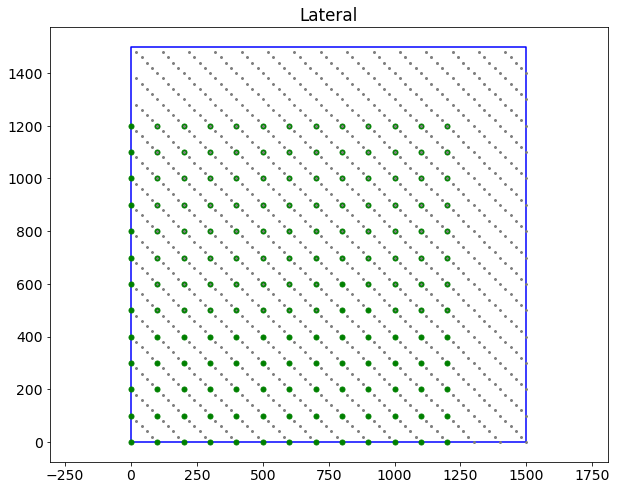

In [7]:
# Plot the probe points
if plotprobept:
    avgdat, headers       = corr.loadavg(filelist, loadfromplanes, avgsavefile, verbose=True)
    # LONG
    plt.figure(figsize=(10,8))
    plt.rc('font', size=14)
    corr.plotprobes(plistLONG, avgdat, headers, verbose=False)
    plt.title('Longitudinal')
    plt.axis('equal')
    # LAT
    plt.figure(figsize=(10,8))
    plt.rc('font', size=14)
    corr.plotprobes(plistLAT, avgdat, headers, verbose=False)
    plt.title('Lateral')
    plt.axis('equal')

In [8]:
plist        = plistLONG + plistLAT
allf, allRij = corr.makeRij(ij, plist, filelist, loadfromplanes, avgsavefile, verbose=True)

Computing [1/1000]: HHplane_0030001_0.dat
Computing [2/1000]: HHplane_0030011_0.dat
Computing [3/1000]: HHplane_0030021_0.dat
Computing [4/1000]: HHplane_0030031_0.dat
Computing [5/1000]: HHplane_0030041_0.dat
Computing [6/1000]: HHplane_0030051_0.dat
Computing [7/1000]: HHplane_0030061_0.dat
Computing [8/1000]: HHplane_0030071_0.dat
Computing [9/1000]: HHplane_0030081_0.dat
Computing [10/1000]: HHplane_0030091_0.dat
Computing [11/1000]: HHplane_0030101_0.dat
Computing [12/1000]: HHplane_0030111_0.dat
Computing [13/1000]: HHplane_0030121_0.dat
Computing [14/1000]: HHplane_0030131_0.dat
Computing [15/1000]: HHplane_0030141_0.dat
Computing [16/1000]: HHplane_0030151_0.dat
Computing [17/1000]: HHplane_0030161_0.dat
Computing [18/1000]: HHplane_0030171_0.dat
Computing [19/1000]: HHplane_0030181_0.dat
Computing [20/1000]: HHplane_0030191_0.dat
Computing [21/1000]: HHplane_0030201_0.dat
Computing [22/1000]: HHplane_0030211_0.dat
Computing [23/1000]: HHplane_0030221_0.dat
Computing [24/1000]:

In [9]:
# Split it back into LONG/LAT
avgRijLong   = np.mean(allRij[:Nlong], axis=0)
avgRijLat    = np.mean(allRij[Nlong:], axis=0)

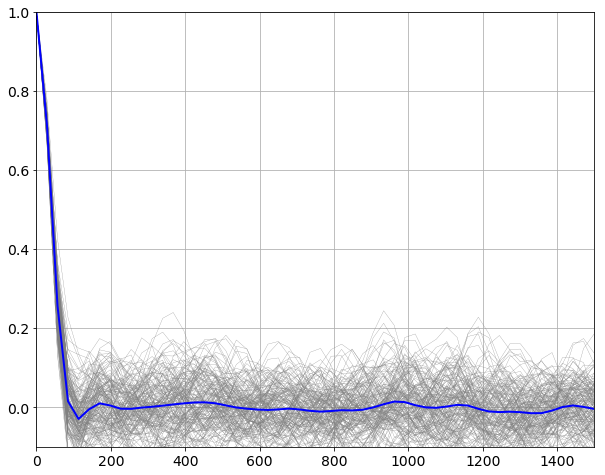

In [10]:
# Plot the LONG Rij
plt.figure(figsize=(10,8))
plt.rc('font', size=14)

for ir, Rij in  enumerate(allRij[:Nlong]):
    plt.plot(allf[Nlong], Rij, 'gray', lw=0.25)
# Average
plt.plot(allf[Nlong], avgRijLong, 'b', lw=2)
plt.ylim([-0.1, 1])
plt.xlim([0, 1500])
plt.grid()

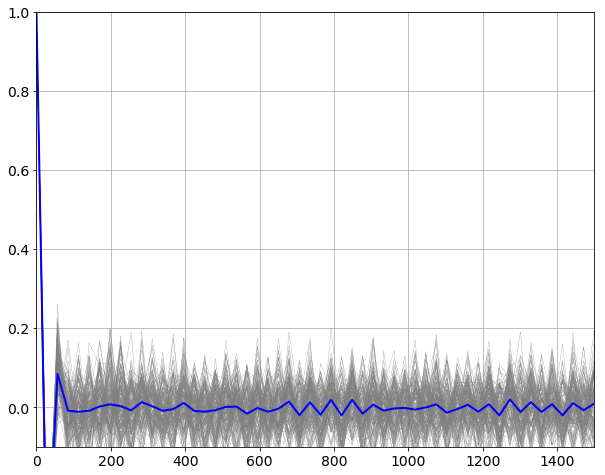

In [11]:
# Plot the LAT Rij
plt.figure(figsize=(10,8))
plt.rc('font', size=14)

for ir, Rij in  enumerate(allRij[Nlong:]):
    plt.plot(allf[Nlong], Rij, 'gray', lw=0.25)
# Average
plt.plot(allf[Nlong], avgRijLat, 'b', lw=2)
plt.ylim([-0.1, 1])
plt.xlim([0, 1500])
plt.grid()

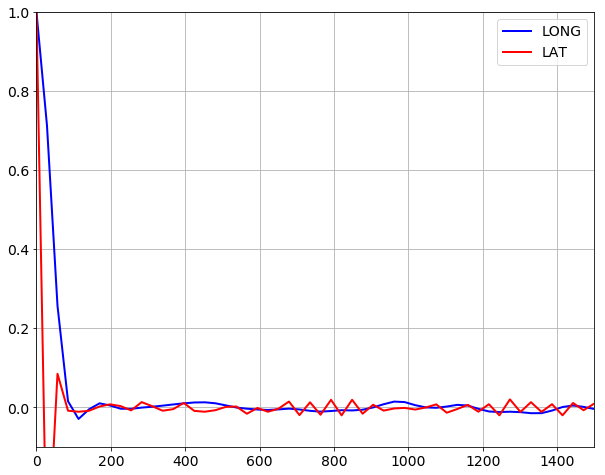

In [12]:
# Plot the LONG+LAT Rij
plt.figure(figsize=(10,8))
plt.rc('font', size=14)

# Average
plt.plot(allf[0], avgRijLong, 'b', lw=2, label='LONG')
plt.plot(allf[Nlong], avgRijLat,  'r', lw=2, label='LAT')
plt.ylim([-0.1, 1])
plt.xlim([0, 1500])
plt.grid()
plt.legend()

In [13]:
# Calculate lengthscale
lengthscale = corr.calclengthscale(allf[0], avgRijLong)
print('LONG lengthscale = %f'%lengthscale)
lengthscale = corr.calclengthscale(allf[Nlong], avgRijLat)
print('LAT lengthscale  = %f'%lengthscale)

LONG lengthscale = 41.788952
LAT lengthscale  = 0.000000


In [14]:
# Save the information
savedat=np.vstack((allf[0], avgRijLong, allf[Nlong], avgRijLat)).transpose()
np.savetxt(Rijsavefile,savedat,header="Xi, RijLong, Xi, RijLat")